In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
model = Sequential()

In [3]:
model.add(Convolution2D(32,(3,3), input_shape = (64,64,3), activation = 'relu'))

In [4]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
model.add(Flatten())

In [6]:
model.add(Dense(units = 128, init ='uniform', activation ='relu'))

In [7]:
model.add(Dense(output_dim = 7, activation = 'softmax', init ='uniform'))

In [8]:
from keras.preprocessing.image import  ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
x_train = train_datagen.flow_from_directory(r'S:\VIT AP\SummerInternship1\COVID 19\train', target_size = (64,64), batch_size = 1, class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'S:\VIT AP\SummerInternship1\COVID 19\test', target_size = (64,64), batch_size = 1, class_mode = 'categorical')

Found 289 images belonging to 7 classes.
Found 76 images belonging to 7 classes.


In [10]:
print(x_train.class_indices)

{'ARDS': 0, 'Bacteria': 1, 'COVID': 2, 'Normal': 3, 'SARS': 4, 'Streptococcus': 5, 'Virus': 6}


In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [12]:
r=model.fit_generator(x_train,steps_per_epoch=289,epochs=500,validation_data=x_test,validation_steps=76)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/500
289/289 [==============================] - 23s 80ms/step - loss: 1.4999 - acc: 0.4394 - val_loss: 1.3981 - val_acc: 0.3947
Epoch 2/500
289/289 [==============================] - 24s 83ms/step - loss: 1.1396 - acc: 0.5640 - val_loss: 1.2495 - val_acc: 0.4079
Epoch 3/500
289/289 [==============================] - 23s 80ms/step - loss: 0.9373 - acc: 0.6436 - val_loss: 1.4827 - val_acc: 0.3816
Epoch 4/500
289/289 [==============================] - 22s 77ms/step - loss: 0.8707 - acc: 0.6678 - val_loss: 1.5064 - val_acc: 0.4605
Epoch 5/500
289/289 [==============================] - 24s 84ms/step - loss: 0.8057 - acc: 0.6678 - val_loss: 2.2058 - val_acc: 0.3553
Epoch 6/500
289/289 [==============================] - 23s 81ms/step - loss: 0.7232 - acc: 0.7301 - val_loss: 1.3141 - val_acc: 0.4474
Epoch 7/500
289/289 [==============================] - 21s 74ms/step - loss: 0.7262 - acc: 0.75

289/289 [==============================] - 22s 76ms/step - loss: 0.2418 - acc: 0.9204 - val_loss: 1.9122 - val_acc: 0.5395
Epoch 58/500
289/289 [==============================] - 22s 76ms/step - loss: 0.2097 - acc: 0.9239 - val_loss: 2.6182 - val_acc: 0.5526
Epoch 59/500
289/289 [==============================] - 22s 76ms/step - loss: 0.2023 - acc: 0.9343 - val_loss: 1.8434 - val_acc: 0.6053
Epoch 60/500
289/289 [==============================] - 22s 75ms/step - loss: 0.1626 - acc: 0.9446 - val_loss: 2.1440 - val_acc: 0.6184
Epoch 61/500
289/289 [==============================] - 22s 76ms/step - loss: 0.1964 - acc: 0.9204 - val_loss: 2.2566 - val_acc: 0.5395
Epoch 62/500
289/289 [==============================] - 22s 77ms/step - loss: 0.1249 - acc: 0.9412 - val_loss: 2.9294 - val_acc: 0.5395
Epoch 63/500
289/289 [==============================] - 23s 81ms/step - loss: 0.1449 - acc: 0.9446 - val_loss: 2.5247 - val_acc: 0.5395
Epoch 64/500
289/289 [==============================] - 23s 7

289/289 [==============================] - 23s 79ms/step - loss: 0.0845 - acc: 0.9689 - val_loss: 2.9716 - val_acc: 0.6053
Epoch 118/500
289/289 [==============================] - 23s 81ms/step - loss: 0.5256 - acc: 0.8962 - val_loss: 3.0939 - val_acc: 0.5395
Epoch 119/500
289/289 [==============================] - 24s 82ms/step - loss: 0.1150 - acc: 0.9585 - val_loss: 2.9186 - val_acc: 0.6316
Epoch 120/500
289/289 [==============================] - 23s 80ms/step - loss: 0.1306 - acc: 0.9585 - val_loss: 3.2760 - val_acc: 0.5263
Epoch 121/500
289/289 [==============================] - 23s 80ms/step - loss: 0.0395 - acc: 0.9862 - val_loss: 3.4511 - val_acc: 0.5000
Epoch 122/500
289/289 [==============================] - 23s 80ms/step - loss: 0.1089 - acc: 0.9758 - val_loss: 3.8401 - val_acc: 0.5263
Epoch 123/500
289/289 [==============================] - 23s 81ms/step - loss: 0.0884 - acc: 0.9689 - val_loss: 3.4295 - val_acc: 0.6316
Epoch 124/500
289/289 [==============================] 

Epoch 177/500
289/289 [==============================] - 28s 96ms/step - loss: 0.0982 - acc: 0.9619 - val_loss: 4.7183 - val_acc: 0.5263
Epoch 178/500
289/289 [==============================] - 28s 96ms/step - loss: 0.0303 - acc: 0.9862 - val_loss: 3.8711 - val_acc: 0.6053
Epoch 179/500
289/289 [==============================] - 28s 97ms/step - loss: 0.0225 - acc: 0.9862 - val_loss: 4.1782 - val_acc: 0.6184
Epoch 180/500
289/289 [==============================] - 27s 94ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 4.2781 - val_acc: 0.6184
Epoch 181/500
289/289 [==============================] - 29s 99ms/step - loss: 0.5196 - acc: 0.9377 - val_loss: 5.3611 - val_acc: 0.5395
Epoch 182/500
289/289 [==============================] - 28s 97ms/step - loss: 0.0652 - acc: 0.9792 - val_loss: 4.4919 - val_acc: 0.5789
Epoch 183/500
289/289 [==============================] - 28s 96ms/step - loss: 0.1163 - acc: 0.9654 - val_loss: 3.6915 - val_acc: 0.6053
Epoch 184/500
289/289 [==================

Epoch 237/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0358 - acc: 0.9896 - val_loss: 3.6258 - val_acc: 0.6842
Epoch 238/500
289/289 [==============================] - 22s 77ms/step - loss: 0.2184 - acc: 0.9516 - val_loss: 2.4914 - val_acc: 0.6974
Epoch 239/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0810 - acc: 0.9723 - val_loss: 3.8500 - val_acc: 0.6316
Epoch 240/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0504 - acc: 0.9862 - val_loss: 3.7075 - val_acc: 0.6842
Epoch 241/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0469 - acc: 0.9862 - val_loss: 3.4195 - val_acc: 0.6711
Epoch 242/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 3.4455 - val_acc: 0.6579
Epoch 243/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0392 - acc: 0.9792 - val_loss: 3.3959 - val_acc: 0.7237
Epoch 244/500
289/289 [==================

Epoch 297/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0418 - acc: 0.9862 - val_loss: 3.7224 - val_acc: 0.6316
Epoch 298/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0410 - acc: 0.9862 - val_loss: 4.7105 - val_acc: 0.6053
Epoch 299/500
289/289 [==============================] - 22s 77ms/step - loss: 0.0166 - acc: 0.9896 - val_loss: 3.3398 - val_acc: 0.6842
Epoch 300/500
289/289 [==============================] - 22s 77ms/step - loss: 0.2848 - acc: 0.9412 - val_loss: 4.4401 - val_acc: 0.5789
Epoch 301/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0789 - acc: 0.9758 - val_loss: 3.7052 - val_acc: 0.6842
Epoch 302/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0697 - acc: 0.9792 - val_loss: 3.2846 - val_acc: 0.6842
Epoch 303/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0207 - acc: 0.9931 - val_loss: 3.2888 - val_acc: 0.6974
Epoch 304/500
289/289 [==================

Epoch 357/500
289/289 [==============================] - 22s 76ms/step - loss: 0.1426 - acc: 0.9689 - val_loss: 2.9875 - val_acc: 0.6842
Epoch 358/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0291 - acc: 0.9931 - val_loss: 4.8275 - val_acc: 0.5658
Epoch 359/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0740 - acc: 0.9827 - val_loss: 4.2141 - val_acc: 0.5921
Epoch 360/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 4.2098 - val_acc: 0.6053
Epoch 361/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 4.6658 - val_acc: 0.5526
Epoch 362/500
289/289 [==============================] - 22s 76ms/step - loss: 0.0061 - acc: 0.9965 - val_loss: 4.2427 - val_acc: 0.6316
Epoch 363/500
289/289 [==============================] - 22s 75ms/step - loss: 0.0250 - acc: 0.9896 - val_loss: 3.6642 - val_acc: 0.6842
Epoch 364/500
289/289 [==================

289/289 [==============================] - 29s 101ms/step - loss: 3.2869e-04 - acc: 1.0000 - val_loss: 3.5841 - val_acc: 0.6579
Epoch 417/500
289/289 [==============================] - 29s 100ms/step - loss: 0.1373 - acc: 0.9758 - val_loss: 5.6770 - val_acc: 0.5789
Epoch 418/500
289/289 [==============================] - 28s 96ms/step - loss: 7.0604e-04 - acc: 1.0000 - val_loss: 5.3500 - val_acc: 0.5921
Epoch 419/500
289/289 [==============================] - 29s 102ms/step - loss: 0.1392 - acc: 0.9792 - val_loss: 4.3371 - val_acc: 0.6579
Epoch 420/500
289/289 [==============================] - 29s 99ms/step - loss: 0.0061 - acc: 0.9965 - val_loss: 4.0993 - val_acc: 0.6974
Epoch 421/500
289/289 [==============================] - 29s 102ms/step - loss: 0.0308 - acc: 0.9862 - val_loss: 5.2778 - val_acc: 0.6184
Epoch 422/500
289/289 [==============================] - 29s 99ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 4.8071 - val_acc: 0.6184
Epoch 423/500
289/289 [====================

289/289 [==============================] - 30s 103ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.6890 - val_acc: 0.6447
Epoch 476/500
289/289 [==============================] - 29s 100ms/step - loss: 0.0913 - acc: 0.9896 - val_loss: 4.1064 - val_acc: 0.6974
Epoch 477/500
289/289 [==============================] - 29s 100ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 4.3337 - val_acc: 0.6711
Epoch 478/500
289/289 [==============================] - 29s 101ms/step - loss: 0.0287 - acc: 0.9931 - val_loss: 3.7652 - val_acc: 0.6842
Epoch 479/500
289/289 [==============================] - 29s 101ms/step - loss: 0.1586 - acc: 0.9827 - val_loss: 5.2824 - val_acc: 0.5921
Epoch 480/500
289/289 [==============================] - 29s 101ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.9239 - val_acc: 0.5921
Epoch 481/500
289/289 [==============================] - 29s 100ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 3.9771 - val_acc: 0.6579
Epoch 482/500
289/289 [=========================

In [13]:
#model.save("Chest_Xray12.h5")

In [14]:
import matplotlib.pyplot as plt

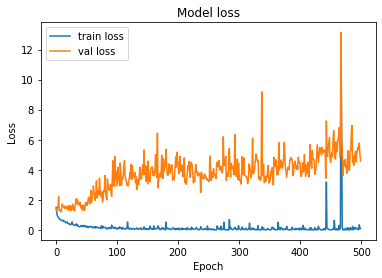

<Figure size 432x288 with 0 Axes>

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.savefig('LossVal_loss')

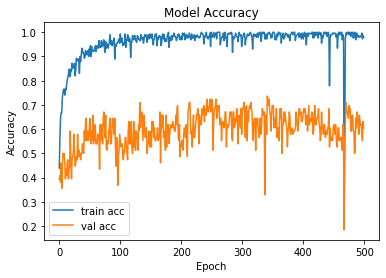

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc')